In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv("train.csv", header=None)
df_train_labels = pd.read_csv("trainLabels.csv", header=None)
df_test = pd.read_csv("test.csv", header=None)

In [3]:
print("training set shape:", df_train.shape)
print("training set labels:", df_train_labels.shape)
print("testing set shape:", df_test.shape)

training set shape: (1000, 40)
training set labels: (1000, 1)
testing set shape: (9000, 40)


In [4]:
# Checking if there is any null or NaN value in both training and testing sets
print("training set missing data:", df_train.isnull().values.any())
print("training set missing data:", df_train.isna().values.any())
print("training labels missing data:", df_train_labels.isnull().values.any())
print("training labels missing data:", df_train_labels.isna().values.any())
print("testing set missing data:", df_test.isnull().values.any())
print("testing set missing data:", df_test.isna().values.any())

training set missing data: False
training set missing data: False
training labels missing data: False
training labels missing data: False
testing set missing data: False
testing set missing data: False


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train_labels, test_size=0.2, random_state=42)

# Data normalization after splitting
# Training set
normalizer = MinMaxScaler()
normalized_train_X = normalizer.fit_transform(X_train) # we fit the normalizer on training data 
# Testing set
normalized_test_X = normalizer.transform(X_test) # transform() aims to use transform all the features using the previous mean and variance.
print(normalized_train_X.shape)
print(normalized_test_X.shape)
print(y_train.shape)
print(y_test.shape)

(800, 40)
(200, 40)
(800, 1)
(200, 1)


In [6]:
# Decision tree
clf = tree.DecisionTreeClassifier(criterion="gini",random_state=42)
clf.fit(normalized_train_X, y_train)
y_pred_dt = clf.predict(normalized_test_X)
# The score method returns the accuracy of the model
accuracy_score(y_test,y_pred_dt)

0.815

In [7]:
# SVC
svclassifier=SVC(kernel='rbf',random_state=42, gamma='auto')
svclassifier.fit(normalized_train_X, y_train.values.ravel())
y_pred_SVM=svclassifier.predict(normalized_test_X)
accuracy_score(y_test, y_pred_SVM)

0.825

In [8]:
# Logistic regression
LR = LogisticRegression().fit(normalized_train_X, y_train.values.ravel())
y_pred_LR=LR.predict(normalized_test_X)
accuracy_score(y_test, y_pred_LR)

0.82

In [9]:
# Random forest
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=2, n_estimators=1024, random_state=42)
rf.fit(normalized_train_X, y_train.values.ravel())
pred_RF = rf.predict(normalized_test_X)
accuracy_score(pred_RF,y_test)

0.885

Therefore, we choose random forest as prediction method since it has the highest accuracy score for the given data prediction.

In [10]:
prediction=rf.predict(df_test)
mysubmission = pd.DataFrame(prediction)

mysubmission.index += 1

mysubmission.columns = ['Solution']
mysubmission['Id'] = np.arange(1, mysubmission.shape[0]+1)
mysubmission = mysubmission[['Id', 'Solution']]

mysubmission.to_csv('Submission.csv',index=False)

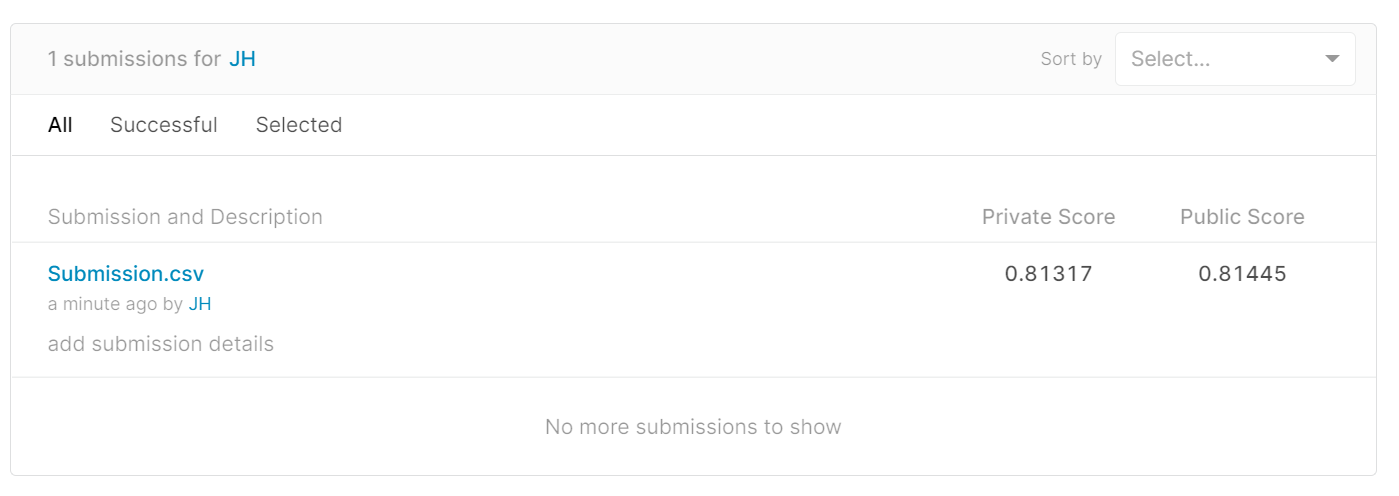

In [11]:
from IPython.display import Image
Image('submission_screenshot.png')